# Saving Plots

In [ ]:
library('ggplot2')

# Plot Size and Resolution

Image is represented as a matrix of points. <br>
When saving image with ggplot2, we are specifying size of the image in inches and dpi - dots per inch.<br>
Inches are related to size of the picture when printed on paper. DPI is the resolution of the image raster.<br>
Where is the problem?<br>
Let's say we save one picture 3 x 2 inches with 300 dpi, and then second one 3x 2 inches with 150 dpi. We would open them to compare them and the one with higher dpi is bigger, how come?<br>
The problem is we have to consider resolution of our screen as well. The picture is saved as a matrix of points, if the resolution is bigger, the matrix will be bigger. When printed on the paper the size of the images will be the same, but the density of the point will be different. But on the monitor we can not change the density of the points, they are physicaly there. So the picture with higher density will look much bigger, because picture matrix is bigger.<br>
But don't get confused by this, remember resolution in DPI tells us how detailed a picture is. Size in inches is related to size of the picture once printed.<br>
Another problem can pose text size, defaultly in pt = points. One pt is ~ .035 cm or ~ .013 in, so if the title of the picture is size of 10 pt, then when printed the title will be 3.5 mm high. But again on your monitor it may look too small or too big, depending on the resolution of your screen. There is one catch in themes size of the text is in points, but in geom_text size is defined in mm. To bring some more confusion, physical points a monitor is made of are called pixels, conversion between pixels and points is 1 pixel = 0.75 points.<br><br>
Example: <br>
Monitor resolution is 5120 x 1440, 109 pixels/inch<br>
Picture resolution is 150 DPI<br>
Picture size is 3 x 2 inches<br>
Text size is 10 pt<br><br>
What resolution will have the resulting picture?<br>
3x150 = 450 <br>
2x150 = 300 <br>
450x300 will be the resolution of the picture<br><br>
How big will be picture on the screen (in inches)?<br>
450/109 = 4.12 inches <br>
300/109 = 2.75 inches <br>
4.12 x 2.75 inches will be the size of the picture on the screen<br><br>

What if we change the resolution to 300 DPI<br>
How big will be this picture on the screen?<br>
3x300 => 900/109 => 8.26 inches
2x300 => 600/109 => 6.42 inches 
8.26 x 6.42 will be the size of the picture on the screen <br>

Size of the printed picture for both cases 150 or 300 DPI will remain the same, that is 3 x 2 inches. But the resolution, density of the grid will be different.


### Dealing with pt and mm in ggplot
ggplot uses .pt constant for conversion: pt = 2.845276<br>
mm = pt / .pt -> 15 / 2.845276 = 5.27 <br>
pt = mm \* .pt -> 5.27 \* 2.845276 = 15 <br>


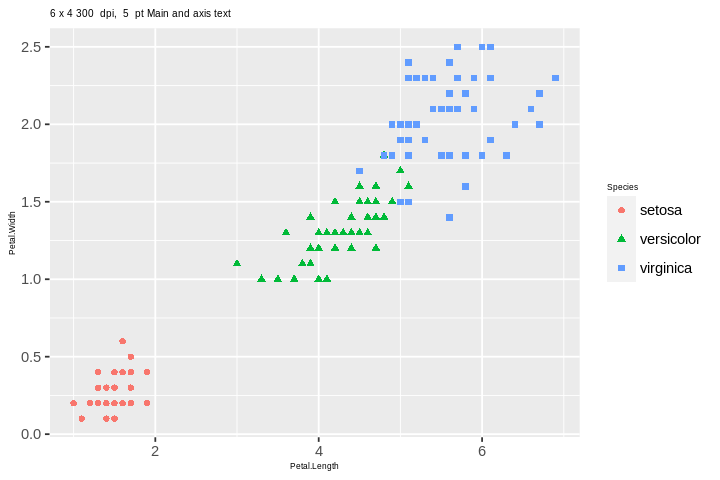

In [ ]:
w = 6
h = 4
dpi = 300
text_size = 5
options(repr.plot.width=w, repr.plot.height=h)
title_text = paste(w, 'x', h, dpi ,' dpi, ', text_size, ' pt Main and axis text')

g = ggplot(iris, aes(Petal.Length, Petal.Width)) + 
    geom_point(aes(color=Species, shape=Species)) +
    ggtitle(title_text) + 
    theme(axis.title=element_text(size=text_size), 
          title=element_text(size=text_size))

fname = paste(dpi,'_',w,'x',h,'txt',text_size,'_plot.png')
ggsave(fname, dpi=dpi, width=w, height=h)
plot(g)

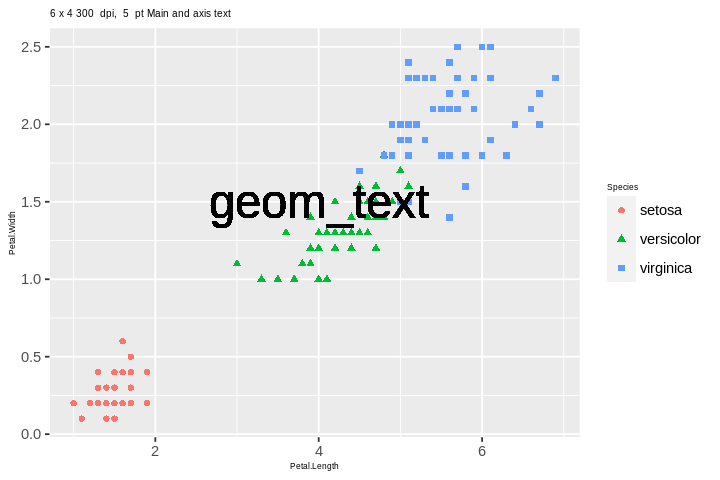

In [ ]:
# Dont forget geom_text uses different units, text size is in mm
g +  geom_text(x=4, y=1.5, label="geom_text", size=10, inherit.aes=FALSE)

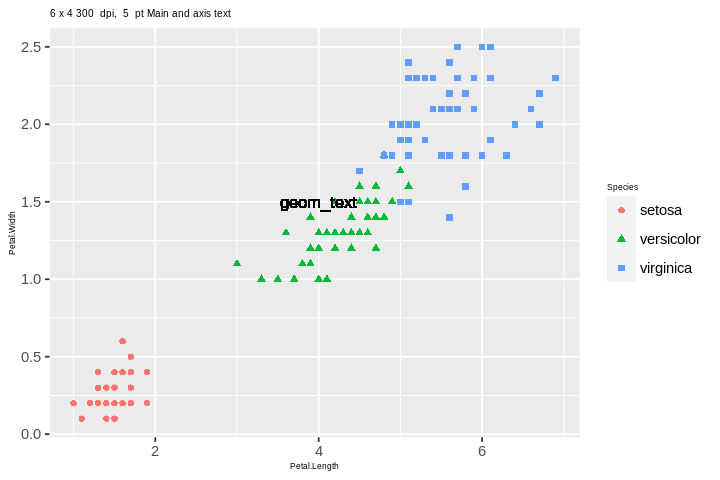

In [ ]:
# solution is to divide the size with a built in pt constant
g +  geom_text(x=4, y=1.5, label="geom_text", size=10/.pt, inherit.aes=FALSE)